In [ ]:
"""
# 1. SETUP & DATA LOADING
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

# OPTIONAL: Use a default matplotlib style
# plt.style.use('default')  # Uncomment if desired

# Define the file path (adjust if using a relative path)
file_path = r"Data Path\american_bankruptcy.csv"

# Load the dataset
df = pd.read_csv(file_path)

print("Data Shape:", df.shape)
display(df.head())


Data Shape: (78682, 21)


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.2670,833.1070,18.3730,89.0310,336.0180,35.1630,128.3480,372.7519,"1,024.3330",740.9980,180.4470,70.6580,191.2260,163.8160,201.0260,"1,024.3330",401.4830,935.3020
1,C_1,alive,2000,485.8560,713.8110,18.5770,64.3670,320.5900,18.5310,115.1870,377.1180,874.2550,701.8540,179.9870,45.7900,160.4440,125.3920,204.0650,874.2550,361.6420,809.8880
2,C_1,alive,2001,436.6560,526.4770,22.4960,27.2070,286.5880,-58.9390,77.5280,364.5928,638.7210,710.1990,217.6990,4.7110,112.2440,150.4640,139.6030,638.7210,399.9640,611.5140
3,C_1,alive,2002,396.4120,496.7470,27.1720,30.7450,259.9540,-12.4100,66.3220,143.3295,606.3370,686.6210,164.6580,3.5730,109.5900,203.5750,124.1060,606.3370,391.6330,575.5920
4,C_1,alive,2003,432.2040,523.3020,26.6800,47.4910,247.2450,3.5040,104.6610,308.9071,651.9580,709.2920,248.6660,20.8110,128.6560,131.2610,131.8840,651.9580,407.6080,604.4670


In [12]:
"""
# 2. INITIAL DATA EXPLORATION
   - Column names, data types, unique companies, missing values
   - Basic summary statistics
"""
# Column names & data types
print("Column Names:", df.columns.tolist())
print("\nData Types:")
display(df.dtypes)

# Number of unique companies
num_unique_companies = df['company_name'].nunique()
print("\nNumber of unique companies:", num_unique_companies)

# Missing values
missing_vals = df.isnull().sum()
print("\nMissing values per column:")
print(missing_vals)

# Summary statistics for numeric features
print("\nStatistical Summary (Numerical):")
display(df.describe())


Column Names: ['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

Data Types:


company_name     object
status_label     object
year              int64
X1              float64
X2              float64
X3              float64
X4              float64
X5              float64
X6              float64
X7              float64
X8              float64
X9              float64
X10             float64
X11             float64
X12             float64
X13             float64
X14             float64
X15             float64
X16             float64
X17             float64
X18             float64
dtype: object


Number of unique companies: 8971

Missing values per column:
company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

Statistical Summary (Numerical):


,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,"78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000"
mean,"2,007.5063",880.3625,"1,594.5290",121.2343,376.7594,201.6057,129.3825,286.8327,"3,414.3546","2,364.0197","2,867.1106",722.4837,255.5250,769.4908,610.0723,532.4671,"2,364.0197","1,773.5640","1,987.2603"
std,5.7428,"3,928.5648","8,930.4847",652.3768,"2,012.0231","1,060.7661","1,265.5320","1,335.9786","18,414.1036","11,950.0688","12,917.9444","3,242.1709","1,494.6435","3,774.7031","2,938.3874","6,369.1594","11,950.0688","8,053.6849","10,419.6290"
min,"1,999.0000",-7.7600,-366.6450,0.0000,"-21,913.0000",0.0000,"-98,696.0000",-0.0060,0.0001,"-1,964.9990",0.0010,-0.0230,"-25,913.0000","-21,536.0000",0.0010,"-102,362.0000","-1,964.9990",0.0010,-317.1970
25%,"2,002.0000",18.9240,17.0383,1.1920,-0.8110,0.0000,-7.4158,3.2812,34.9800,27.5485,37.3635,0.0000,-2.7870,8.5213,8.8893,-68.2827,27.5485,13.4860,32.8725
50%,"2,007.0000",100.4495,103.6610,7.9295,15.0345,7.0230,1.6160,22.8200,227.5118,186.5985,213.2035,7.5935,6.5180,63.5815,43.3330,-1.1310,186.5985,81.9880,168.9120
75%,"2,012.0000",431.5267,634.5480,47.9718,139.6552,74.7473,40.1442,131.5805,"1,244.8899","1,046.4025","1,171.3648",248.7608,87.5990,344.0743,222.8170,146.0700,"1,046.4025",629.9750,875.5222
max,"2,018.0000","169,662.0000","374,623.0000","28,430.0000","81,730.0000","62,567.0000","104,821.0000","65,812.0000","1,073,390.5400","511,729.0000","531,864.0000","166,250.0000","71,230.0000","137,106.0000","116,866.0000","402,089.0000","511,729.0000","337,980.0000","481,580.0000"


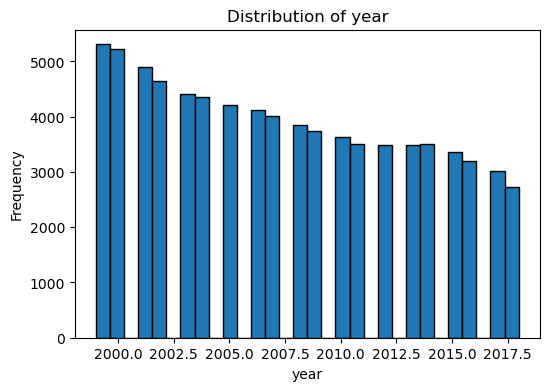

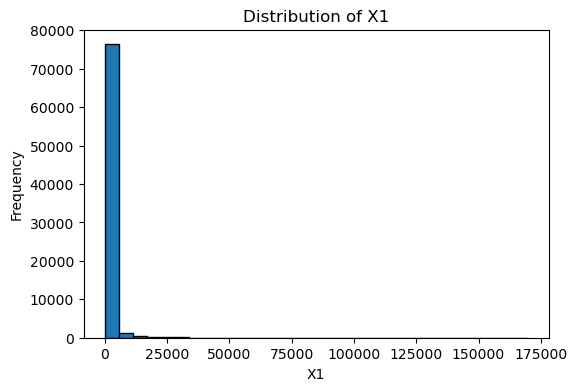

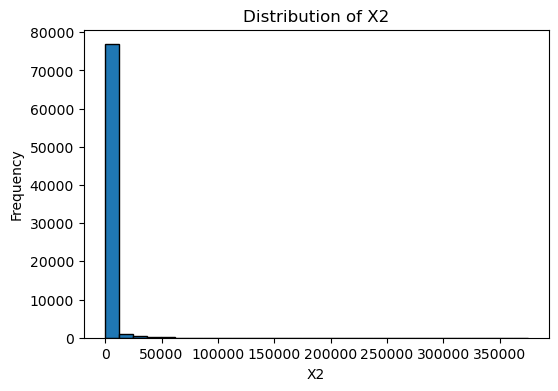

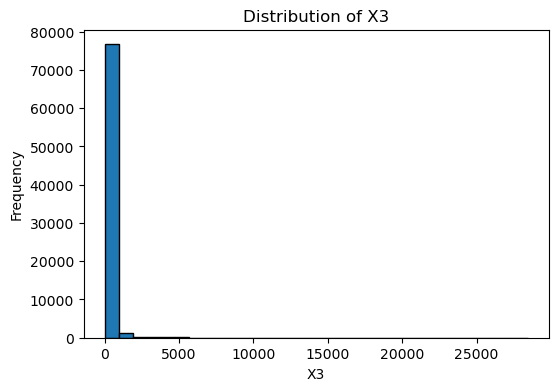

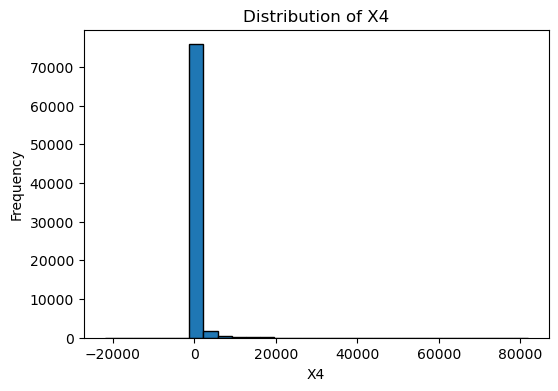

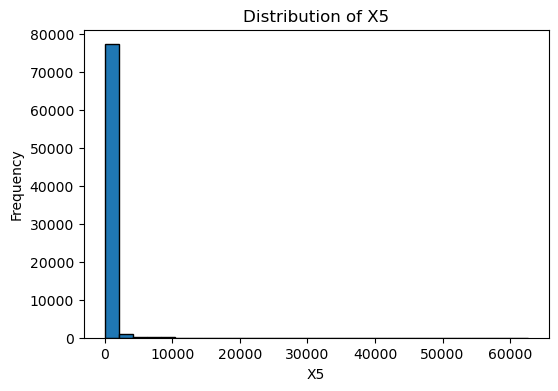

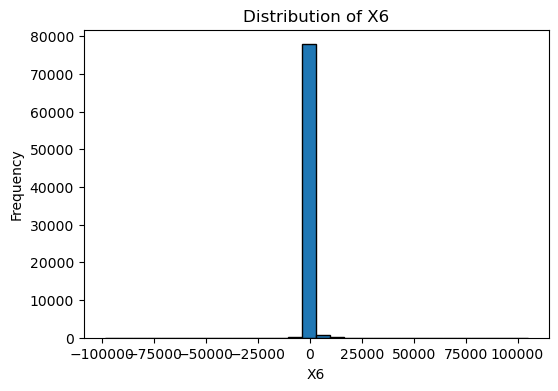

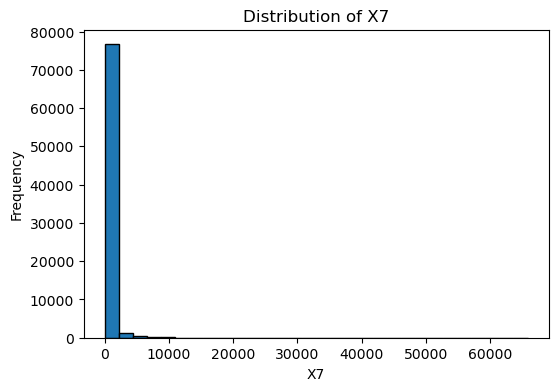

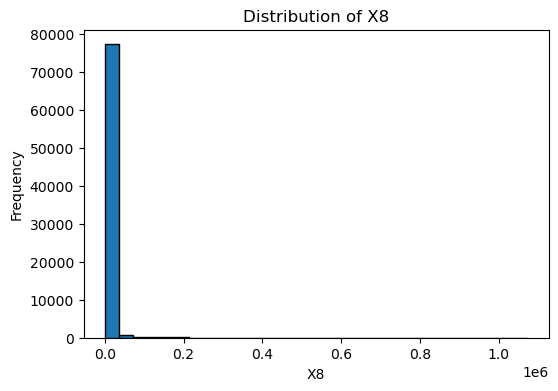

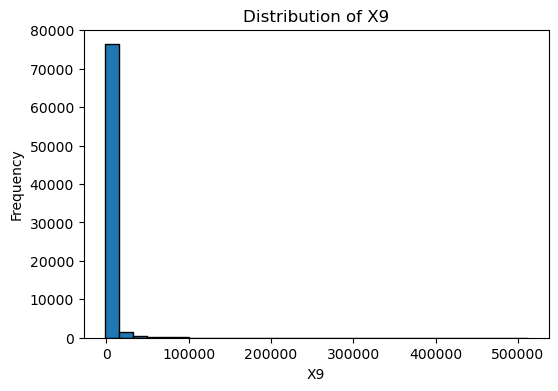

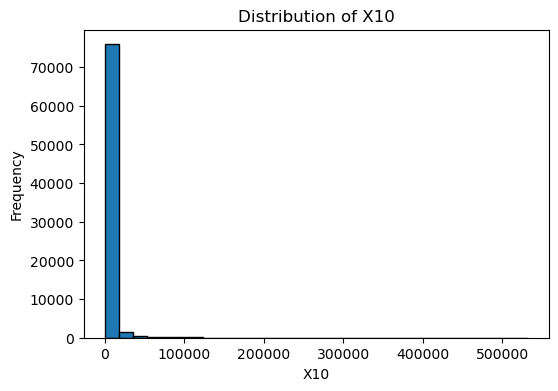

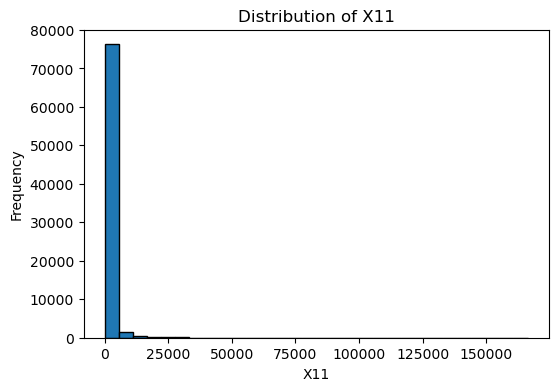

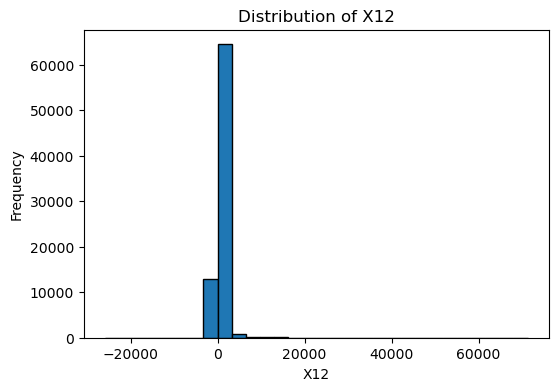

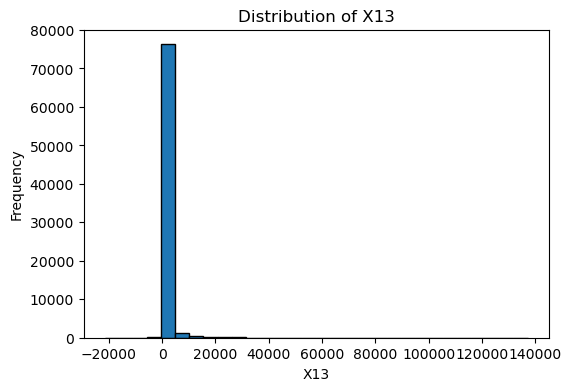

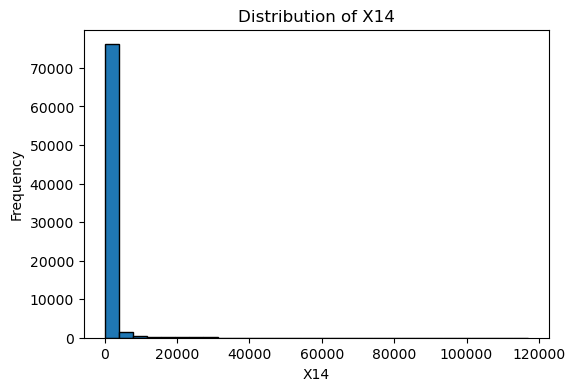

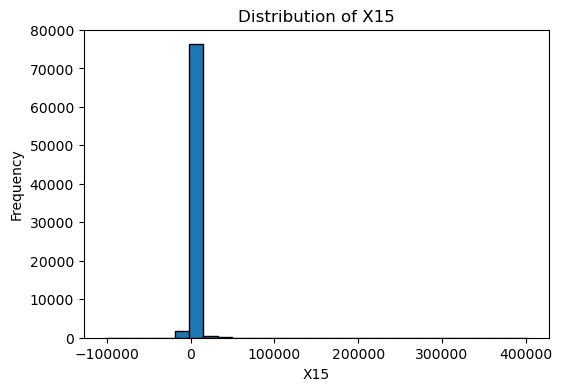

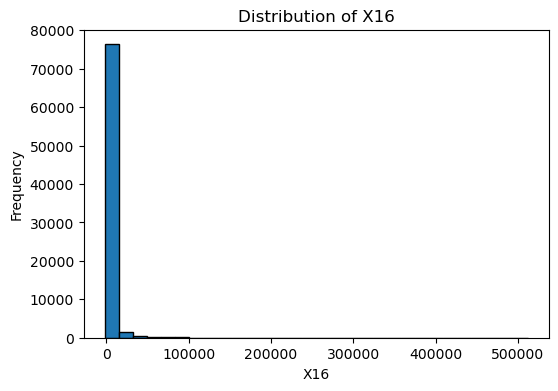

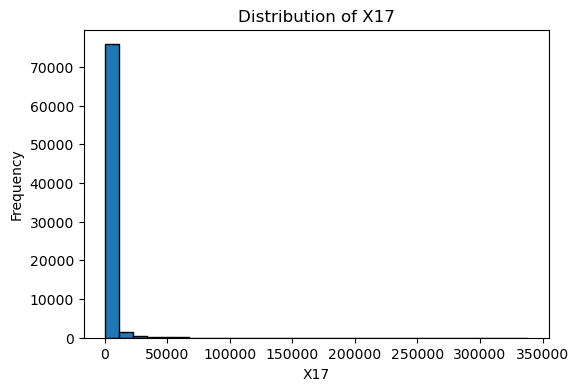

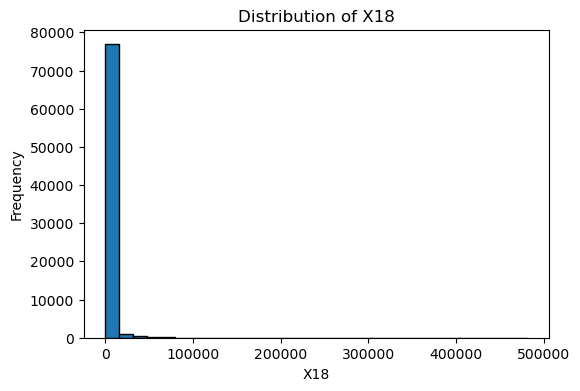

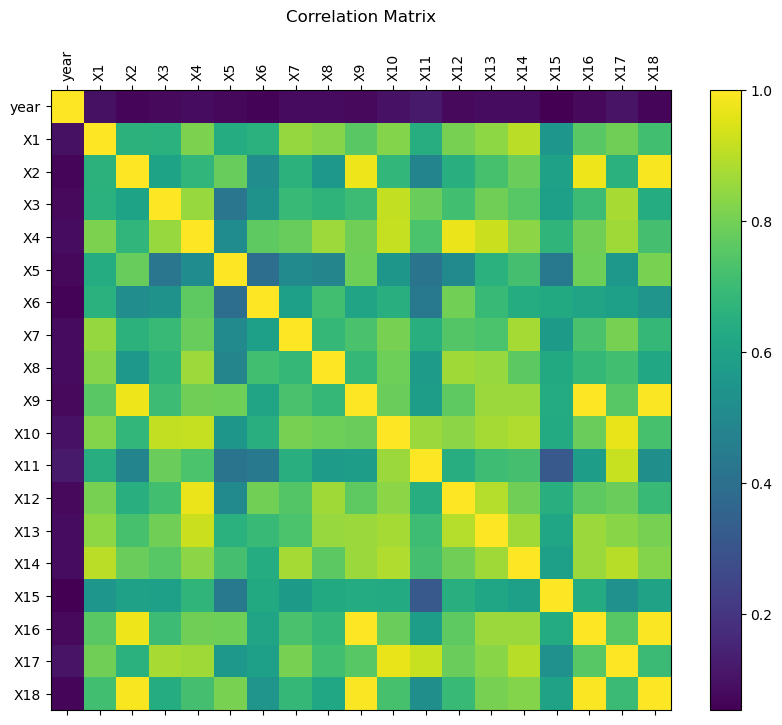

In [13]:
"""
# 3. DISTRIBUTIONS & CORRELATION
   - Histograms of numeric columns
   - Correlation matrix
"""
numeric_cols = df.select_dtypes(include=np.number).columns

# Histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix", pad=20)
plt.show()


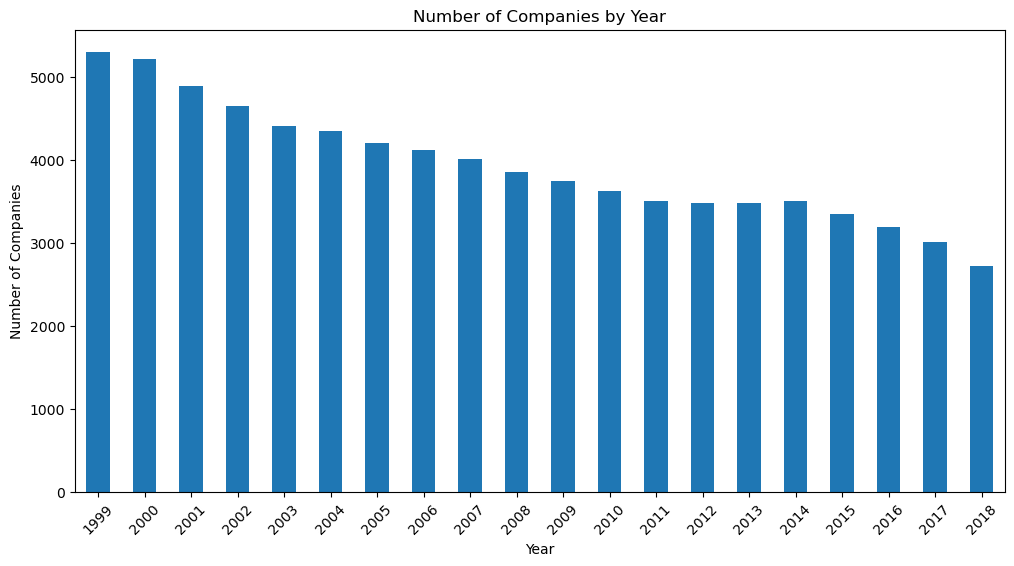

Number of left-censored companies (first year = 1999): 5308


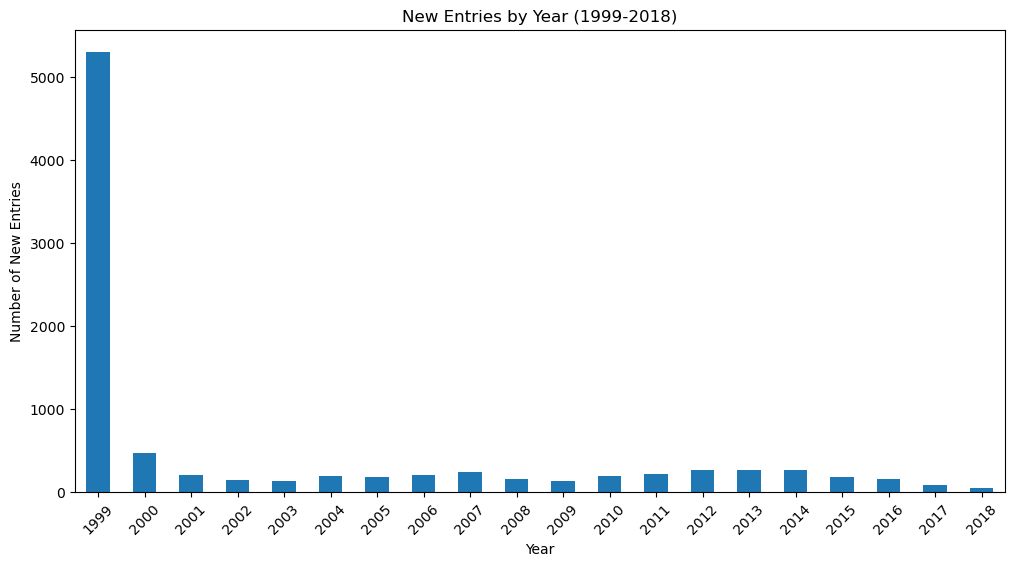

In [14]:
"""
# 4. YEAR-BASED ANALYSIS
   - Companies by year
   - Left-censored companies
   - New entries by year
"""
# Sort values to ensure chronological order
df = df.sort_values(by=['company_name', 'year'])

# Number of companies in each year
companies_by_year = df.groupby('year')['company_name'].nunique()
plt.figure(figsize=(12, 6))
companies_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Number of Companies by Year')
plt.xticks(rotation=45)
plt.show()

# First year each company appears
first_year = df.groupby('company_name')['year'].min().reset_index()
first_year.columns = ['company_name', 'first_year']

# Left-censored = first appearance in 1999
left_censored_companies = first_year[first_year['first_year'] == 1999]
num_left_censored_companies = left_censored_companies['company_name'].nunique()
print("Number of left-censored companies (first year = 1999):", num_left_censored_companies)

# Plot new entries by year (>= 1999)
first_year_after_1999 = first_year[first_year['first_year'] >= 1999]
new_entries_by_year = first_year_after_1999['first_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
new_entries_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of New Entries')
plt.title('New Entries by Year (1999-2018)')
plt.xticks(rotation=45)
plt.show()


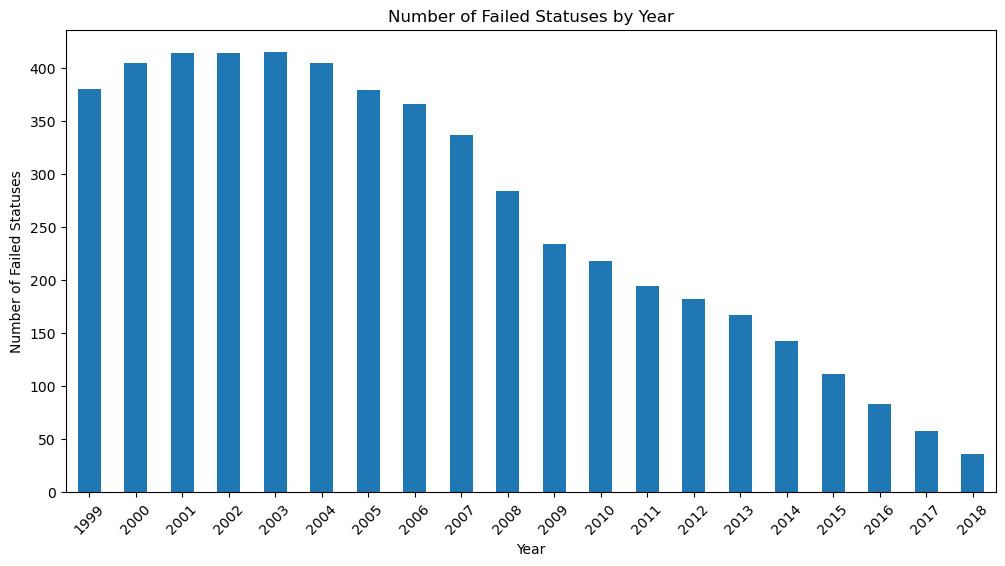

Number of companies with more than one 'failed' status: 599
Max number of 'failed' statuses for a single company: 20
Number of observations that would be lost post-first-failure: 4611


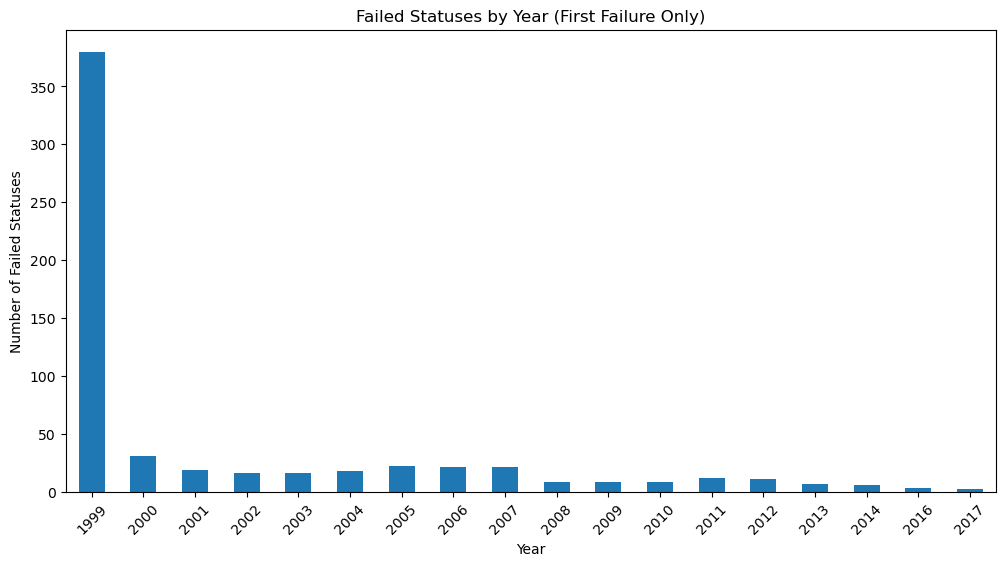

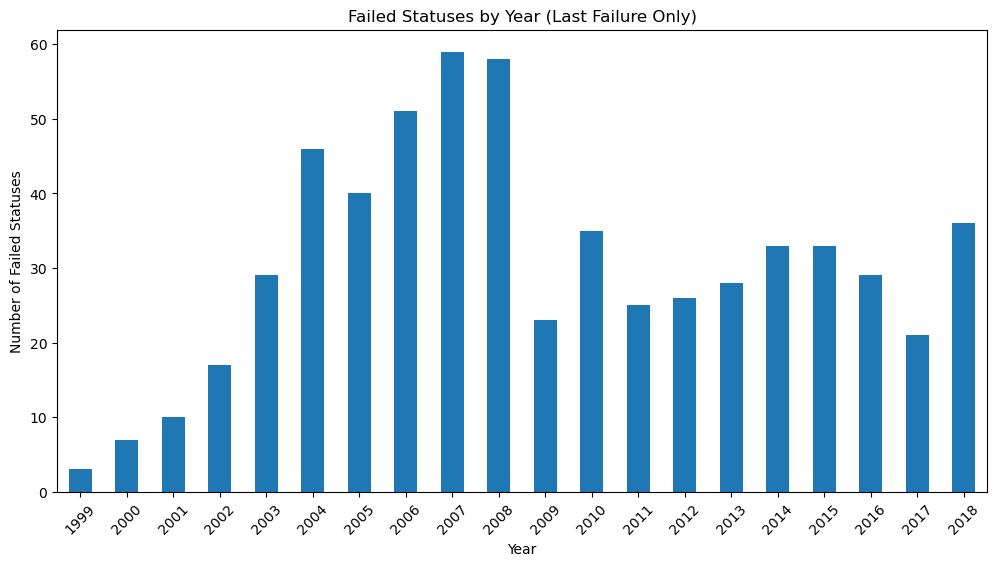

Total 'failed' (original): 5220
Total 'failed' (first instance): 609
Total 'failed' (last instance): 609
Number of companies with 'alive' status after any 'failed' status: 0


In [15]:
"""
# 5. "FAILED" STATUS ANALYSIS
   - Failed counts by year
   - Multiple failures per company
   - Observations lost if ignoring post-failure data
   - Comparing first vs. last failure
   - Checking if any company is 'alive' after 'failed'
"""
# Failed counts by year (simple count)
failed_df_simple = df[df['status_label'] == 'failed']
failed_by_year_simple = failed_df_simple['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
failed_by_year_simple.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Failed Statuses')
plt.title('Number of Failed Statuses by Year')
plt.xticks(rotation=45)
plt.show()

# Companies with multiple failed statuses
failed_counts = failed_df_simple.groupby('company_name').size()
companies_with_multiple_failures = failed_counts[failed_counts > 1]
num_companies_with_multiple_failures = companies_with_multiple_failures.count()
print("Number of companies with more than one 'failed' status:", num_companies_with_multiple_failures)
print("Max number of 'failed' statuses for a single company:", failed_counts.max())

# Observations lost if we remove data after first failure per company
first_failed = df[df['status_label'] == 'failed'].groupby('company_name')['year'].min().reset_index()
first_failed.columns = ['company_name', 'first_failed_year']
df = df.merge(first_failed, on='company_name', how='left')

observations_to_drop = df[(df['status_label'] == 'failed') & (df['year'] > df['first_failed_year'])]
num_observations_lost = observations_to_drop.shape[0]
print("Number of observations that would be lost post-first-failure:", num_observations_lost)

# Plot first failed status by year
failed_first_only = df[df['status_label'] == 'failed'].drop_duplicates(
    subset='company_name', keep='first')
failed_by_year_first = failed_first_only['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
failed_by_year_first.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Failed Statuses')
plt.title('Failed Statuses by Year (First Failure Only)')
plt.xticks(rotation=45)
plt.show()

# Plot last failed status by year
failed_last_only = df[df['status_label'] == 'failed'].drop_duplicates(
    subset='company_name', keep='last')
failed_by_year_last = failed_last_only['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
failed_by_year_last.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Failed Statuses')
plt.title('Failed Statuses by Year (Last Failure Only)')
plt.xticks(rotation=45)
plt.show()

# Count original vs. deduplicated failed statuses
failed_df_original = df[df['status_label'] == 'failed']
total_failed_original = failed_df_original.shape[0]
total_failed_first = failed_first_only.shape[0]
total_failed_last = failed_last_only.shape[0]

print("Total 'failed' (original):", total_failed_original)
print("Total 'failed' (first instance):", total_failed_first)
print("Total 'failed' (last instance):", total_failed_last)

# Check companies with 'alive' status after 'failed'
companies_with_failed = df[df['status_label'] == 'failed']['company_name'].unique()
filtered_df = df[df['company_name'].isin(companies_with_failed)].sort_values(by=['company_name', 'year'])

num_companies_with_alive_after_failed = 0
for company, company_df in filtered_df.groupby('company_name'):
    # Find the earliest year of failure
    failed_years = company_df[company_df['status_label'] == 'failed']['year']
    if not failed_years.empty:
        earliest_fail_year = failed_years.min()
        # Check if there's an 'alive' after that fail year
        if any((row['status_label'] == 'alive') and (row['year'] > earliest_fail_year)
               for _, row in company_df.iterrows()):
            num_companies_with_alive_after_failed += 1

print("Number of companies with 'alive' status after any 'failed' status:", 
      num_companies_with_alive_after_failed)



=== DESCRIPTIVE STATS BY STATUS (NUMERIC) ===


year                                                     \
                   count       mean    std        min        25%        50%   
status_label                                                                  
alive        73,462.0000 2,007.6339 5.7824 1,999.0000 2,002.0000 2,007.0000   
failed        5,220.0000 2,005.7109 4.8059 1,999.0000 2,002.0000 2,005.0000   

                                            X1                              \
                    75%        max       count     mean        std     min   
status_label                                                                 
alive        2,013.0000 2,018.0000 73,462.0000 914.5426 4,052.0479 -7.7600   
failed       2,009.0000 2,018.0000  5,220.0000 399.3394 1,147.8373  0.0010   

                                                             X2             \
                 25%      50%      75%          max       count       mean   
status_label                                                                 
alive        19.2353 102.9175 450.0417 169,662.0000 73,462.0000 1,646.9826   
failed       15.3158  75.8715 269.1135  16,548.0000  5,220.0000   856.3410   

                                                                          \
                    std       min     25%      50%      75%          max   
status_label                                                               
alive        9,210.5876 -366.6450 17.0135 103.5340 652.4688 374,623.0000   
failed       2,767.9132   -0.6660 17.2515 106.6385 468.8455  40,683.0000   

                      X3                                                 \
                   count     mean      std    min    25%    50%     75%   
status_label                                                              
alive        73,462.0000 123.7464 671.2821 0.0000 1.1852 7.9350 48.0018   
failed        5,220.0000  85.8809 268.5268 0.0000 1.3148 7.8465 47.4420   

                                  X4                                           \
                     max       count     mean        std          min     25%   
status_label                                                                    
alive        28,430.0000 73,462.0000 393.6846 2,076.6015 -21,913.0000 -0.6580   
failed        5,475.0000  5,220.0000 138.5686   521.2846  -5,062.0000 -4.2415   

                                                   X5                      \
                 50%      75%         max       count     mean        std   
status_label                                                                
alive        15.6180 144.6790 81,730.0000 73,462.0000 208.5601 1,089.9181   
failed        7.7900  85.7000  6,136.0000  5,220.0000 103.7354   482.3689   

                                                               X6           \
                min    25%    50%     75%         max       count     mean   
status_label                                                                 
alive        0.0000 0.0000 7.1170 76.7878 62,567.0000 73,462.0000 141.9947   
failed       0.0000 0.0767 6.1710 52.0335  9,963.0000  5,220.0000 -48.1123   

                                                                            \
                    std          min      25%     50%     75%          max   
status_label                                                                 
alive        1,299.2596 -98,696.0000  -6.4848  2.0715 43.4440 104,821.0000   
failed         592.0509 -27,446.0000 -26.0388 -3.3270  9.2032   5,996.4170   

                      X7                                                      \
                   count     mean        std     min    25%     50%      75%   
status_label                                                                   
alive        73,462.0000 297.7945 1,377.3966 -0.0060 3.3730 23.4540 136.1015   
failed        5,220.0000 132.5653   421.6916  0.0000 2.2418 15.2180  79.7083   

                                  X8                                        \
                     max       c

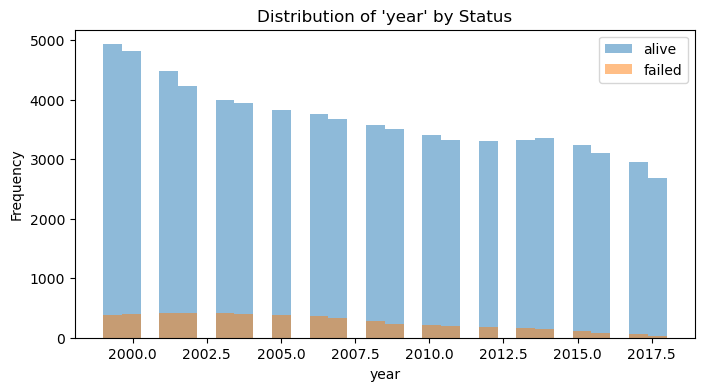

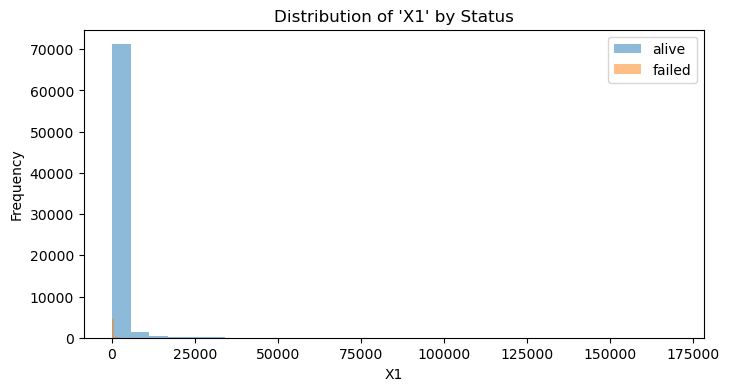

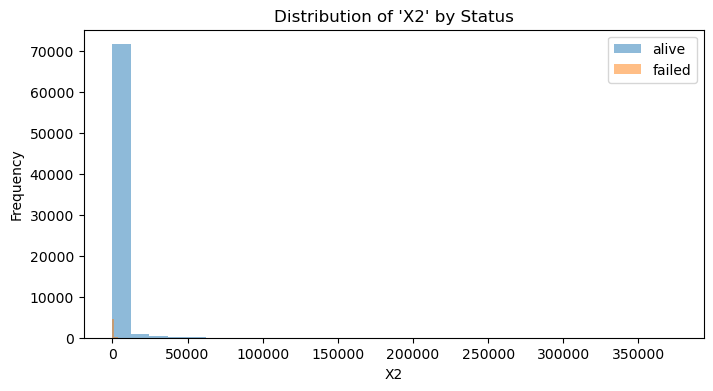

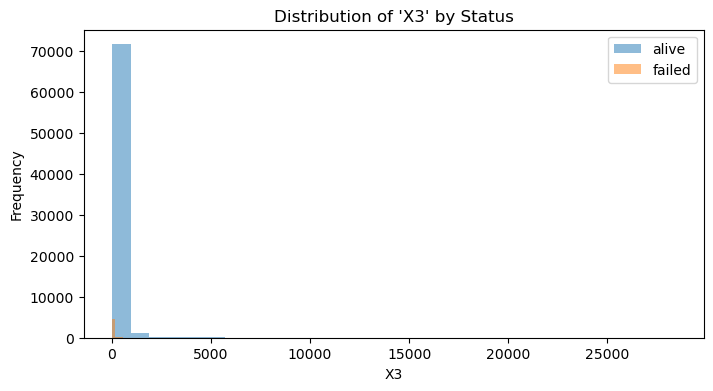

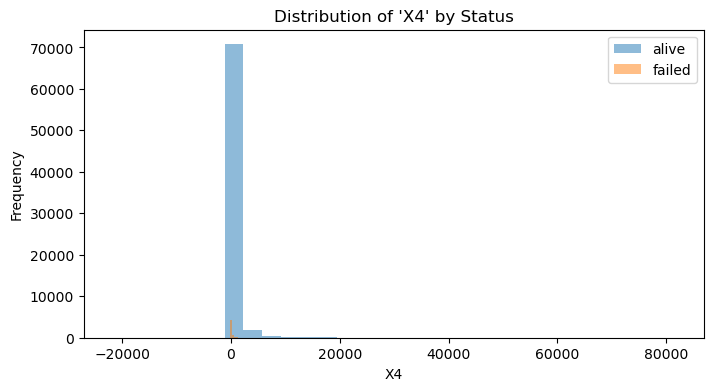

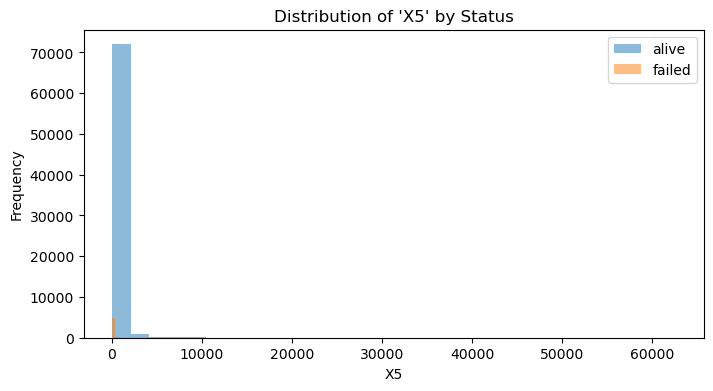

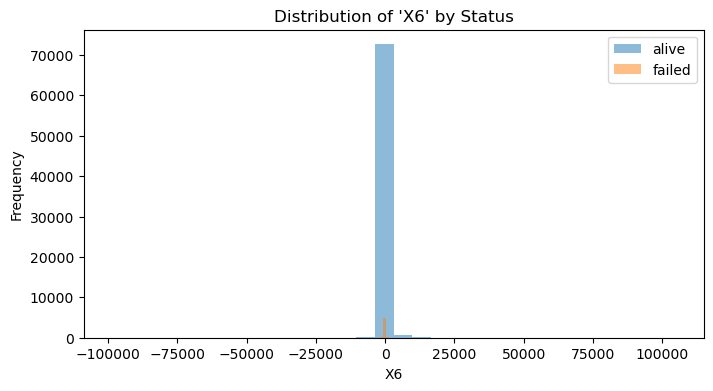

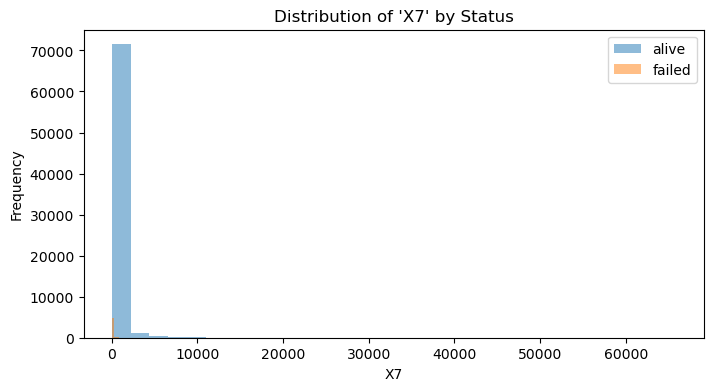

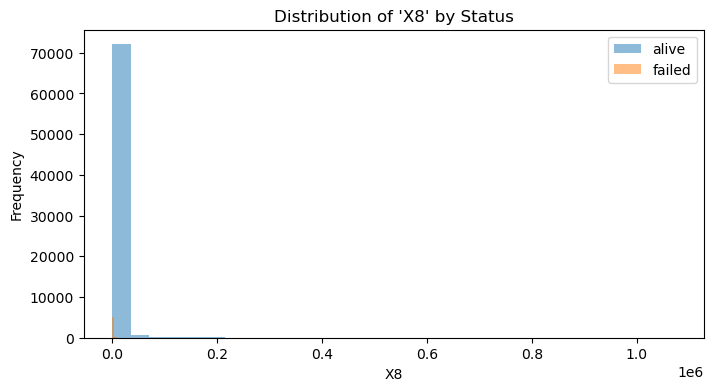

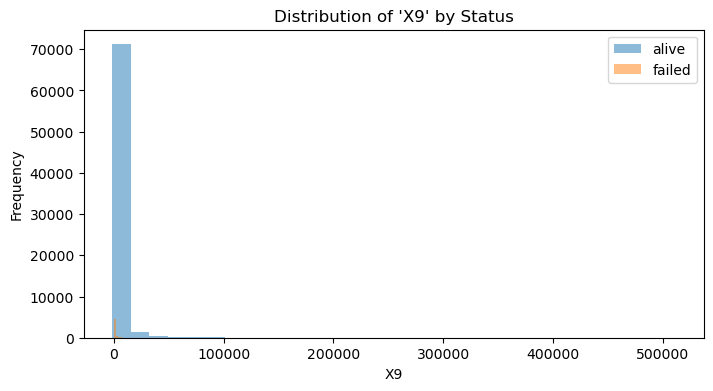

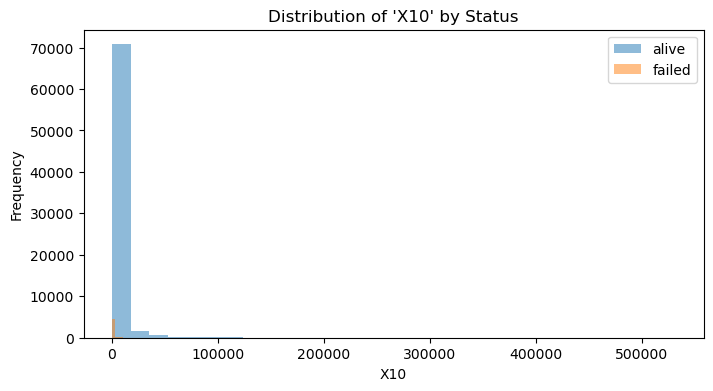

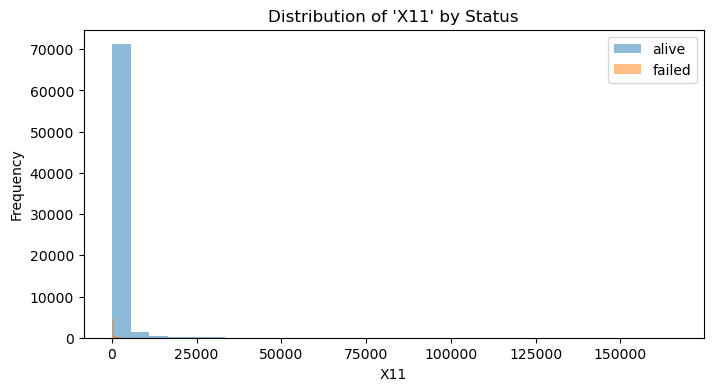

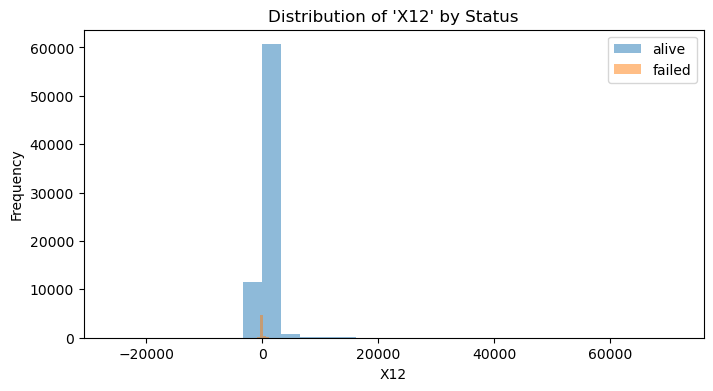

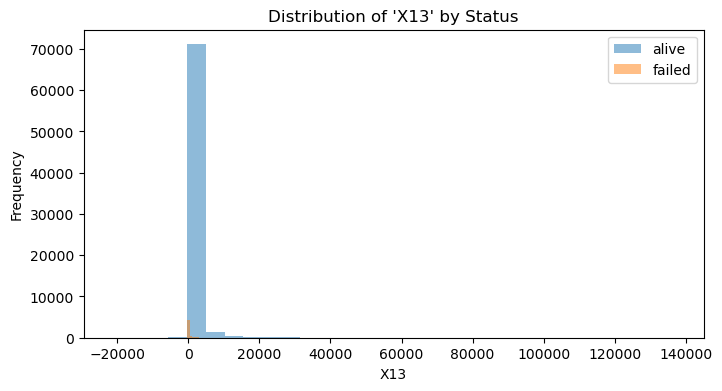

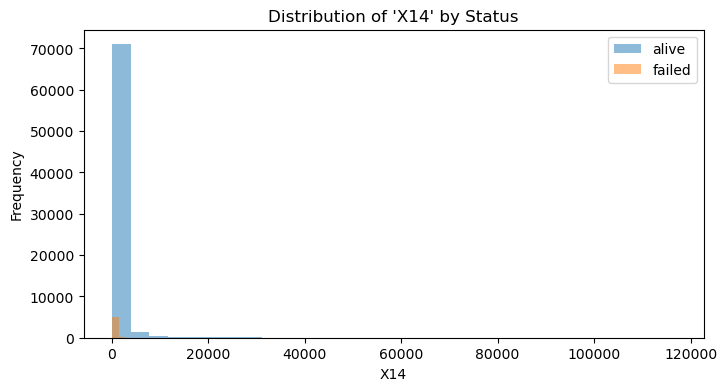

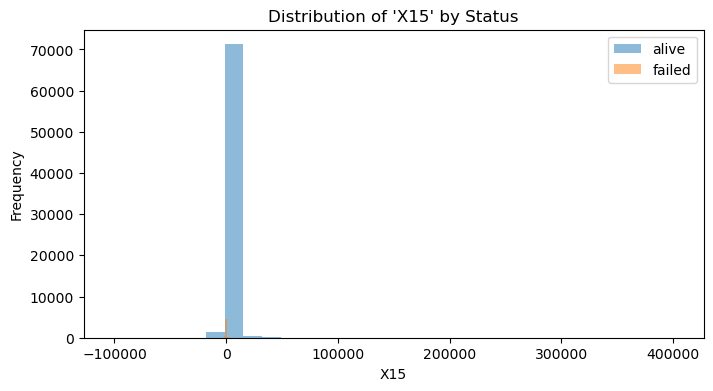

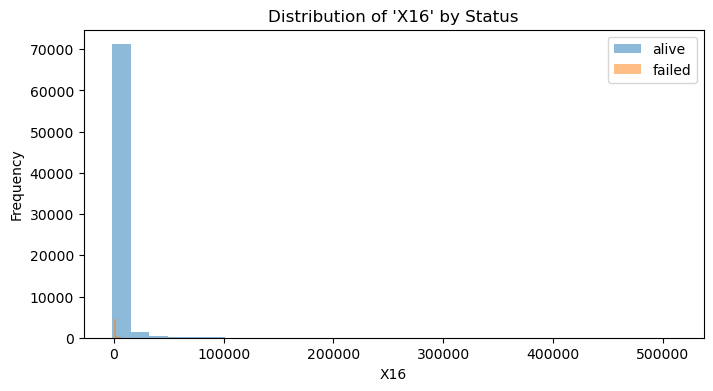

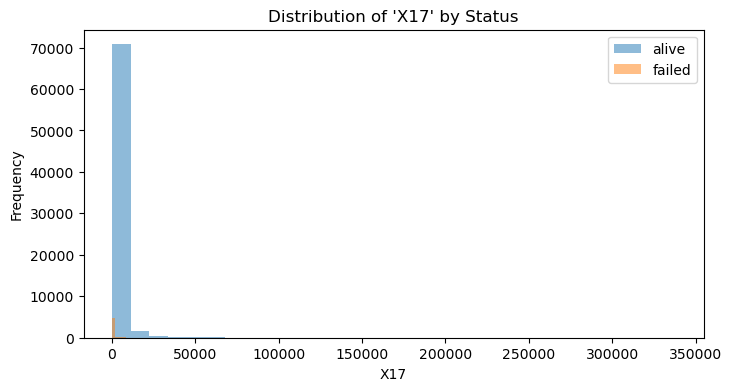

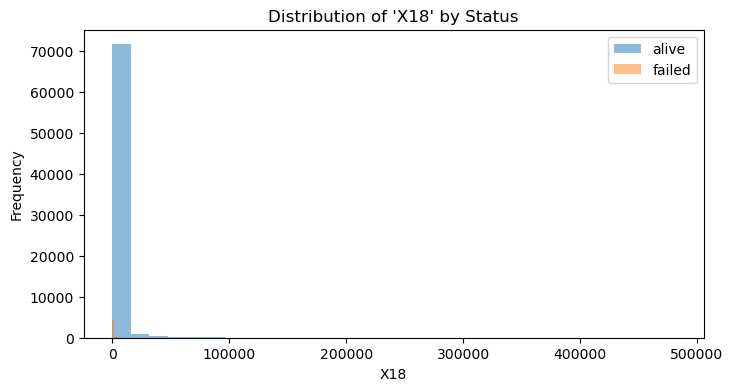

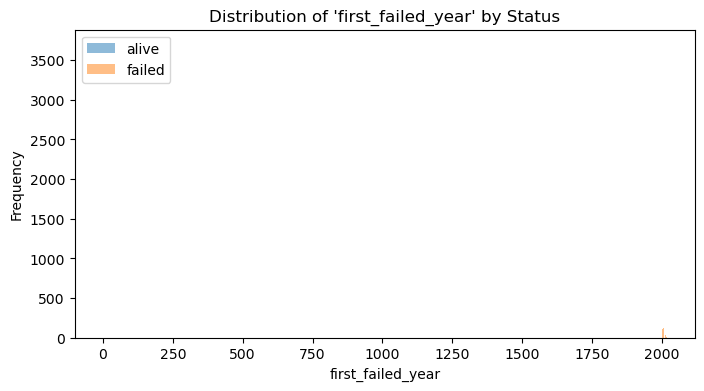


=== COUNTS OF STATUS BY YEAR ===


status_label,alive,failed
year,,
1999,4928,380
2000,4822,404
2001,4483,414
2002,4237,414
2003,4002,415
2004,3944,404
2005,3826,379
2006,3762,366
2007,3673,336


<Figure size 1000x600 with 0 Axes>

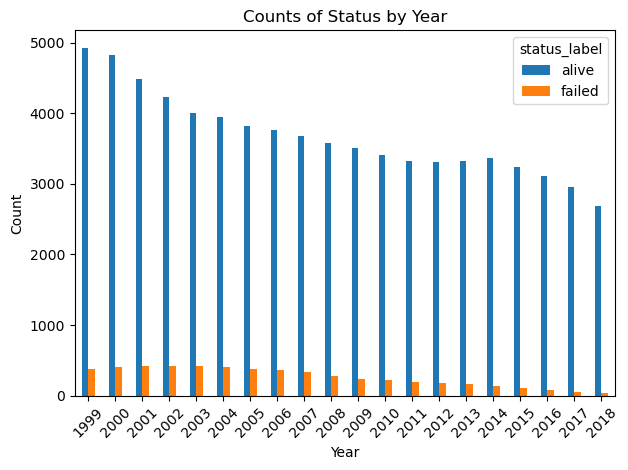


=== FAILURE RATE BY YEAR (Unique Companies) ===


,total_companies,failed_companies,fail_rate
year,,,
1999,5308,380,0.0716
2000,5226,404,0.0773
2001,4897,414,0.0845
2002,4651,414,0.0890
2003,4417,415,0.0940
2004,4348,404,0.0929
2005,4205,379,0.0901
2006,4128,366,0.0887
2007,4009,336,0.0838


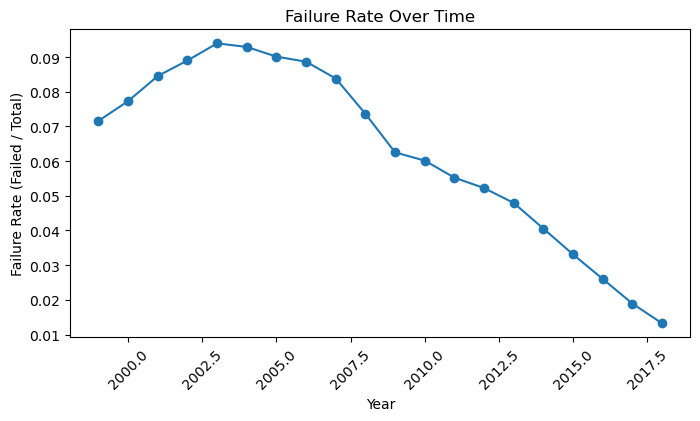


=== CORRELATION WITH FAILURE (1=Failed, 0=Alive) ===
year: -0.083
X6: -0.037
X8: -0.037
X12: -0.036
X1: -0.033
X4: -0.032
X13: -0.031
X7: -0.031
X15: -0.029
X9: -0.026
X16: -0.026
X10: -0.025
X5: -0.025
X18: -0.024
X14: -0.024
X2: -0.022
X17: -0.017
X3: -0.014
X11: -0.009
first_failed_year: nan

No duplicate (company_name, year) rows found.


c:\Users\Sima\anaconda3\envs\dsi_participant\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Sima\anaconda3\envs\dsi_participant\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [16]:
"""
# 6. ADDITIONAL EDA
   - Numeric features vs. status_label
   - Failure rate over time
   - Correlation of numeric features with a binary failure indicator
   - Duplicate (company, year) checks
"""
# 6.1 Compare Numeric Features by Status (Describe)
numeric_cols = df.select_dtypes(include=np.number).columns
if 'status_label' in df.columns:
    print("\n=== DESCRIPTIVE STATS BY STATUS (NUMERIC) ===")
    display(df.groupby('status_label')[numeric_cols].describe())

# 6.2 Visualize Numeric Columns by Status
if 'status_label' in df.columns:
    statuses = df['status_label'].unique()
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        for status in statuses:
            subset = df[df['status_label'] == status]
            plt.hist(subset[col].dropna(), bins=30, alpha=0.5, label=status)
        plt.title(f"Distribution of '{col}' by Status")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

# 6.3 Crosstab / Pivot Table of Status by Year
if 'year' in df.columns and 'status_label' in df.columns:
    print("\n=== COUNTS OF STATUS BY YEAR ===")
    status_year_ct = pd.crosstab(df['year'], df['status_label'])
    display(status_year_ct)

    plt.figure(figsize=(10, 6))
    status_year_ct.plot(kind='bar', stacked=False)
    plt.title("Counts of Status by Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6.4 Failure Rate Over Time (Unique Companies)
if {'year', 'company_name', 'status_label'}.issubset(df.columns):
    companies_by_year = df.groupby('year')['company_name'].nunique()
    failed_by_year = df[df['status_label'] == 'failed'].groupby('year')['company_name'].nunique()

    failure_rate_df = pd.DataFrame({
        'total_companies': companies_by_year,
        'failed_companies': failed_by_year
    }).fillna(0)
    failure_rate_df['fail_rate'] = (failure_rate_df['failed_companies'] /
                                    failure_rate_df['total_companies'])

    print("\n=== FAILURE RATE BY YEAR (Unique Companies) ===")
    display(failure_rate_df)

    plt.figure(figsize=(8, 4))
    plt.plot(failure_rate_df.index, failure_rate_df['fail_rate'], marker='o')
    plt.title("Failure Rate Over Time")
    plt.xlabel("Year")
    plt.ylabel("Failure Rate (Failed / Total)")
    plt.xticks(rotation=45)
    plt.show()

# 6.5 Correlation of Numeric Features with a Binary 'failed' Indicator
if 'status_label' in df.columns:
    df['failed_binary'] = df['status_label'].map({'failed': 1, 'alive': 0})
    if df['failed_binary'].notnull().any() and len(numeric_cols) > 0:
        corr_list = {}
        for col in numeric_cols:
            if df[col].dtype in [np.float64, np.int64]:
                valid_mask = df[col].notnull() & df['failed_binary'].notnull()
                if valid_mask.sum() > 1:
                    corr_value = np.corrcoef(df.loc[valid_mask, col],
                                             df.loc[valid_mask, 'failed_binary'])[0, 1]
                    corr_list[col] = corr_value

        # Sort by absolute correlation with 'failed_binary'
        sorted_corr = dict(sorted(corr_list.items(), key=lambda x: abs(x[1]), reverse=True))
        print("\n=== CORRELATION WITH FAILURE (1=Failed, 0=Alive) ===")
        for feature, cval in sorted_corr.items():
            print(f"{feature}: {cval:.3f}")

# 6.6 Duplicate (Company, Year) Check
if {'company_name', 'year'}.issubset(df.columns):
    duplicates = df.duplicated(subset=['company_name', 'year'], keep=False)
    if duplicates.any():
        print("\n=== DUPLICATE (COMPANY, YEAR) ROWS FOUND ===")
        display(df[duplicates].sort_values(['company_name', 'year']))
    else:
        print("\nNo duplicate (company_name, year) rows found.")
